In [1]:
import pandas as pd

file_path = 'BankChurners.csv'
df = pd.read_csv(file_path)

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Exploratory data analysis

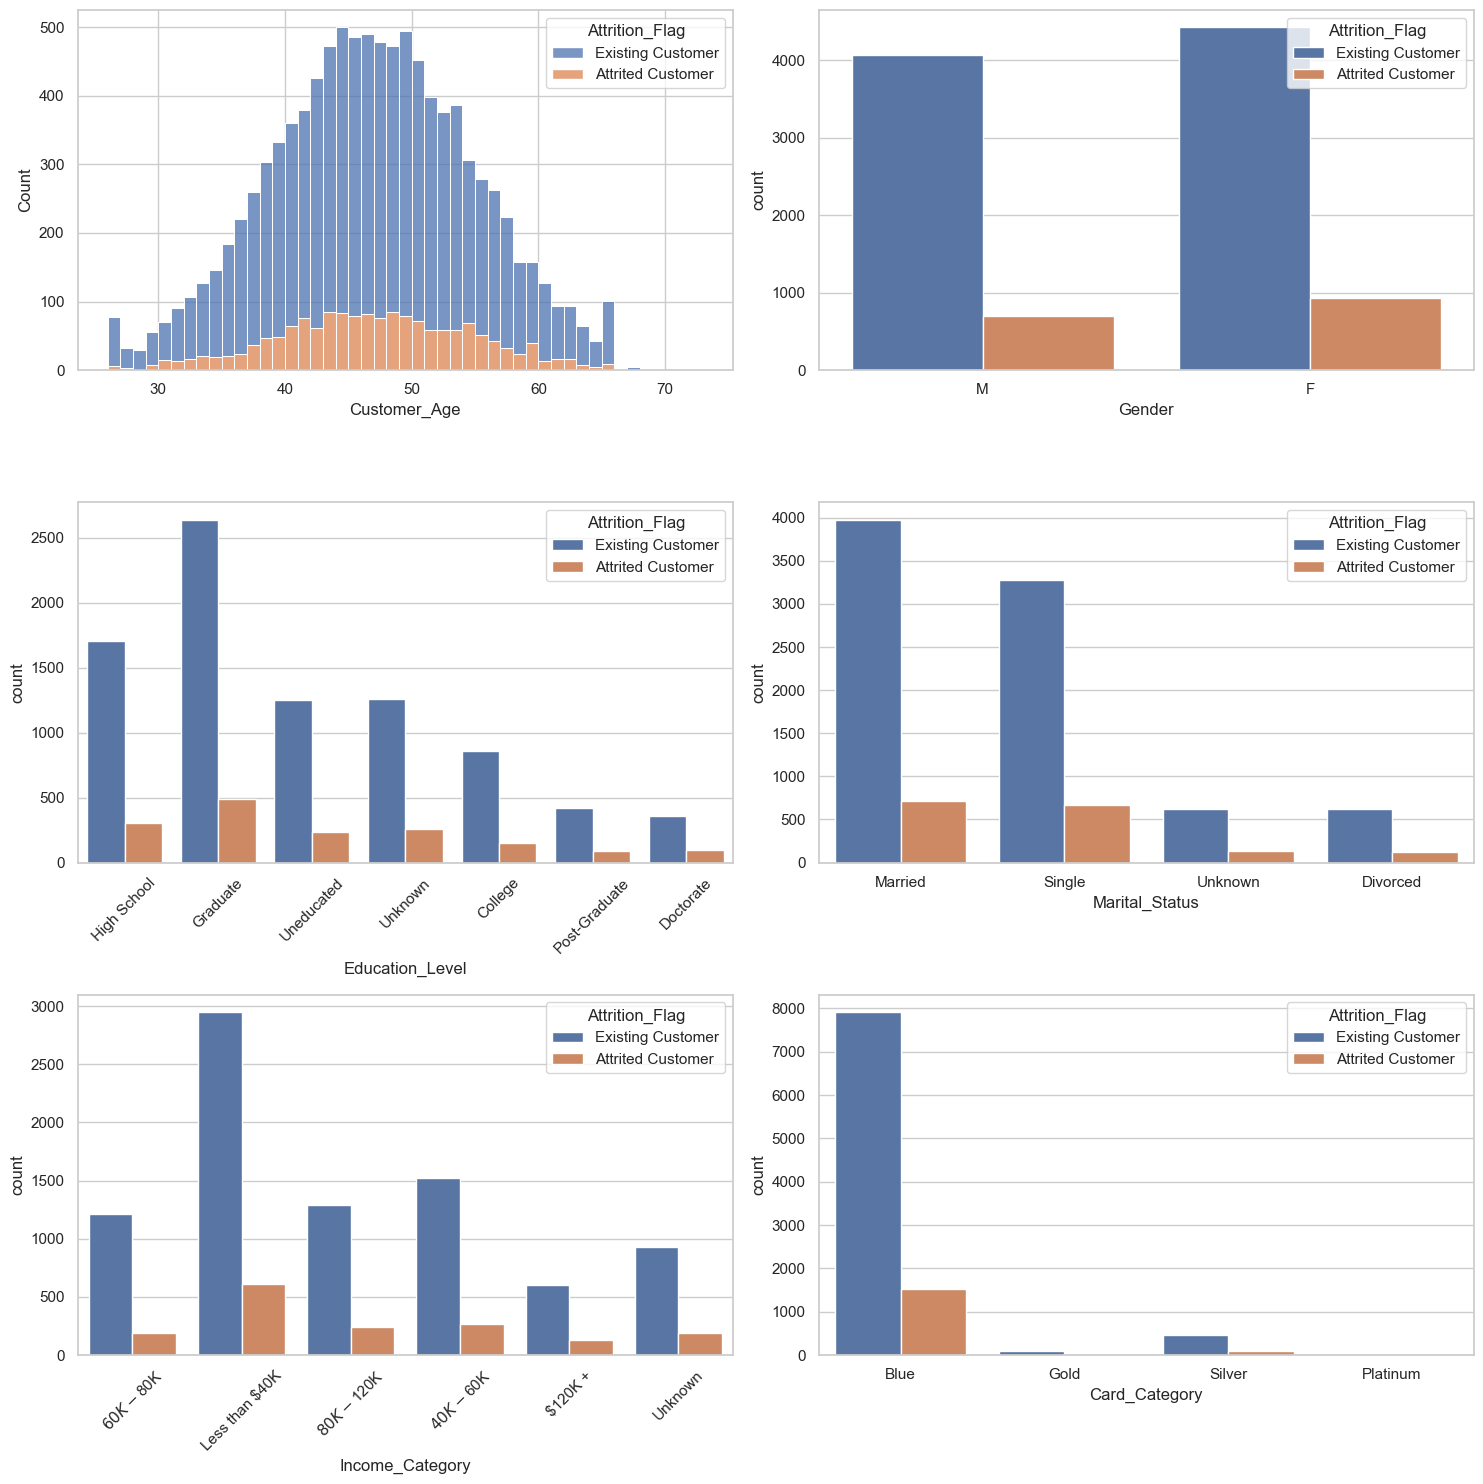

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.histplot(df, x="Customer_Age", hue="Attrition_Flag", multiple="stack", ax=axes[0, 0])

sns.countplot(x="Gender", hue="Attrition_Flag", data=df, ax=axes[0, 1])

sns.countplot(x="Education_Level", hue="Attrition_Flag", data=df, ax=axes[1, 0])
plt.setp(axes[1, 0].get_xticklabels(), rotation=45)

sns.countplot(x="Marital_Status", hue="Attrition_Flag", data=df, ax=axes[1, 1])

sns.countplot(x="Income_Category", hue="Attrition_Flag", data=df, ax=axes[2, 0])
plt.setp(axes[2, 0].get_xticklabels(), rotation=45)

sns.countplot(x="Card_Category", hue="Attrition_Flag", data=df, ax=axes[2, 1])

plt.tight_layout()
plt.show()
